Notebook to test some basic functionalities

In [1]:
import matplotlib.pyplot as plt
from connections import Connections
from connectome_reader import ConnectomeReader
from neuron import Neuron

In [ ]:
cr = ConnectomeReader('v1.0','MANC')

In [3]:
rc = ConnectomeReader('v630','FAFB')

Perform synaptic based representation.
Allows to test the data loading and preprocessing fro the Neuron class and the Connections class.

In [2]:
from connections import Connections

#VNC = Connections(split_neurons=MDNs)  # full VNC
VNC = Connections()  # full VNC

Attribute class_1 not found in the graph. Adding it.


In [3]:
df = VNC.get_dataframe()
df.head()

,start_bid,syn_count,end_bid,nt_type,eff_weight,subdivision_start,subdivision_end,syn_count_norm,eff_weight_norm,start_uid,end_uid
0,10000,136,14882,acetylcholine,136,0,0,0.049908,0.049908,7517,3144
1,10000,36,11047,acetylcholine,36,0,0,0.006809,0.006809,7517,4138
2,10000,9,17889,acetylcholine,9,0,0,0.006303,0.006303,7517,18947
3,10000,21,22805,acetylcholine,21,0,0,0.015119,0.015119,7517,8989
4,10000,9,24198,acetylcholine,9,0,0,0.037975,0.037975,7517,13225


In [ ]:
g = VNC.get_graph(syn_threshold = 800)
print(g.nodes.data())

In [ ]:
VNC.display_graph(syn_threshold=400)

True
False
   start_bid  syn_count  end_bid        nt_type  eff_weight  \
0      10000        136    14882  acetylcholine         136   
1      10000         36    11047  acetylcholine          36   
2      10000          9    17889  acetylcholine           9   
3      10000         21    22805  acetylcholine          21   
4      10000          9    24198  acetylcholine           9   

   subdivision_start  subdivision_end  syn_count_norm  eff_weight_norm  \
0                  0                0        0.049908         0.049908   
1                  0                0        0.006809         0.006809   
2                  0                0        0.006303         0.006303   
3                  0                0        0.015119         0.015119   
4                  0                0        0.037975         0.037975   

   start_uid  end_uid  
0       7517     3144  
1       7517     4138  
2       7517    18947  
3       7517     8989  
4       7517    13225  
Attribute class_1 not

<Axes: title={'center': 'MDN-MDN-per-neuropil'}>

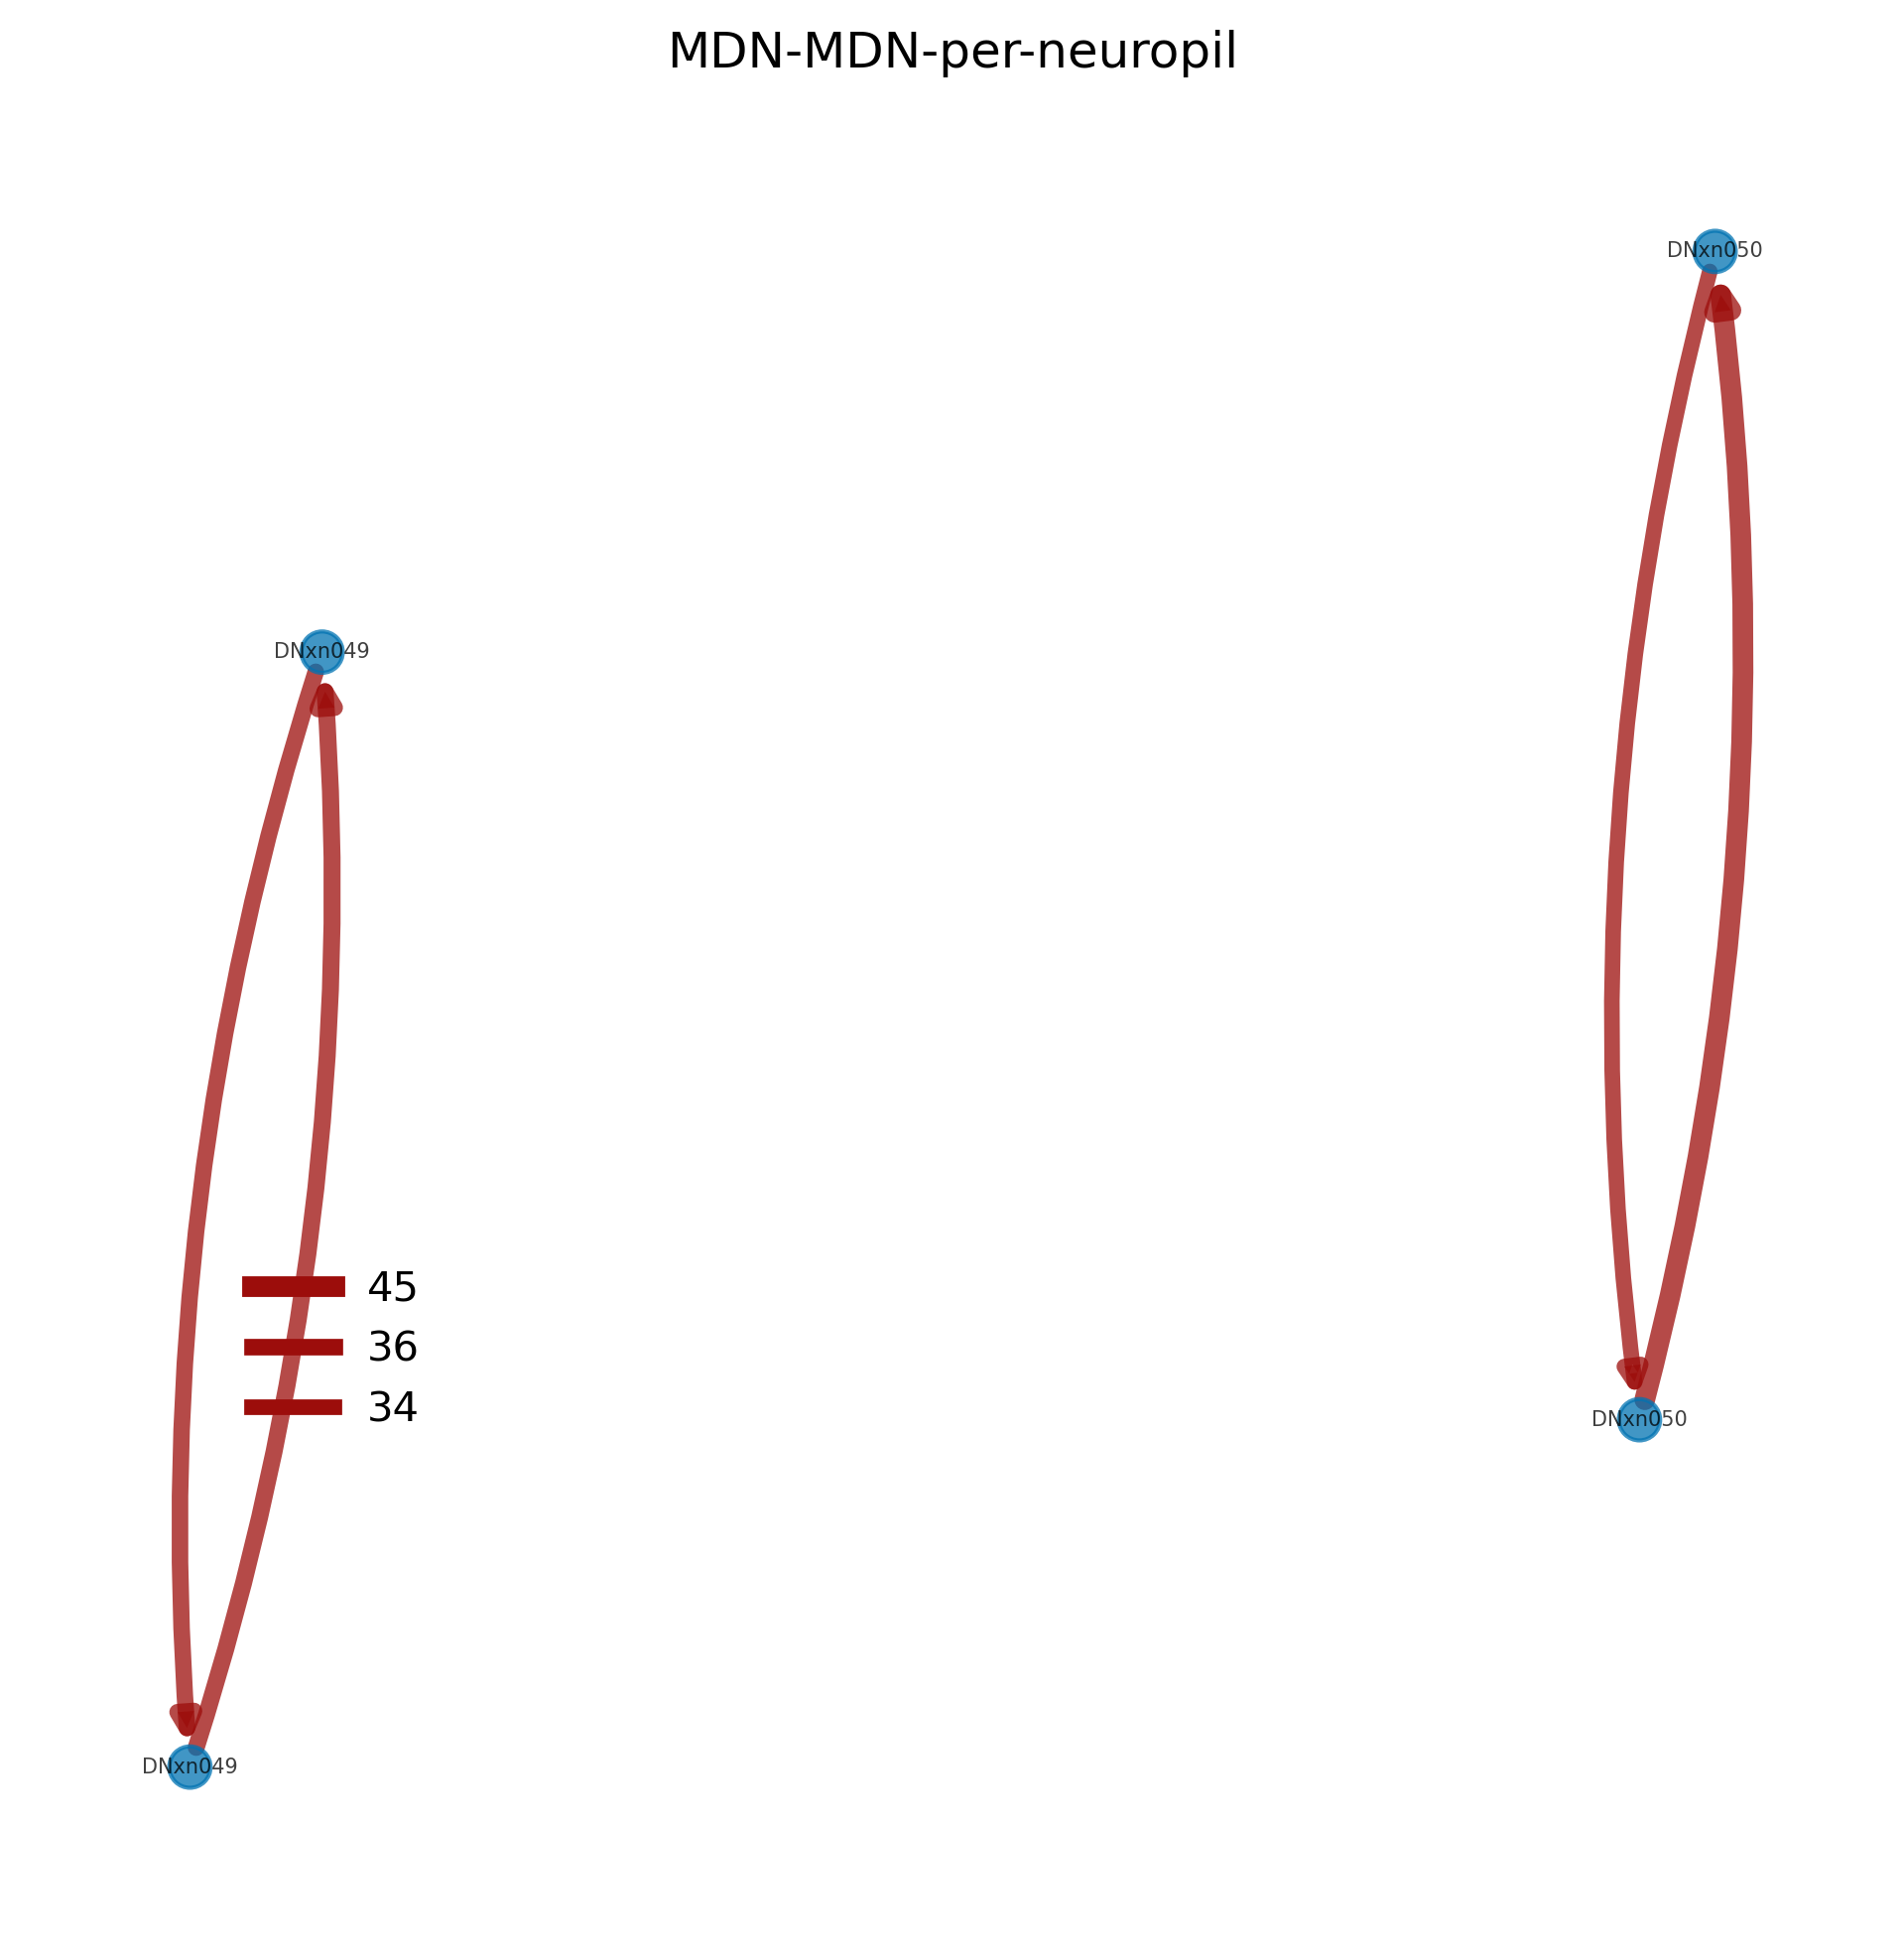

In [2]:
mdn_uids = VNC.get_neuron_ids({'type': 'MDN'})
mdn_connections = VNC.subgraph(nodes=mdn_uids)
mdn_connections.display_graph(
    label_nodes=True,
    title='MDN-MDN-per-neuropil',
    save = False
    )